In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/4/ВИМ/Lab1/crime.csv', encoding='latin1')

##Предобработка данных

In [ ]:
data_norm = data.copy()
data_norm.SHOOTING.fillna('N', inplace=True)

In [ ]:
def shootings(shoot: str):
  if shoot == "Y":
    return 1
  else:
    return 0

In [ ]:
data_norm["SHOOTING"] = data_norm["SHOOTING"].apply(shootings)

In [ ]:
data_norm.Lat.replace(-1, None, inplace=True)
data_norm.Long.replace(-1, None, inplace=True)

data_norm['Lat'].fillna(data_norm['Lat'].median(), inplace = True)
data_norm['Long'].fillna(data_norm['Long'].median(), inplace = True)

In [ ]:
data_norm.DISTRICT.fillna('B2', inplace=True)

##Сравнение результатов с работой 2

###Наиболее частые происшествия

Узнаем, какие происшествия наиболее часто происходят

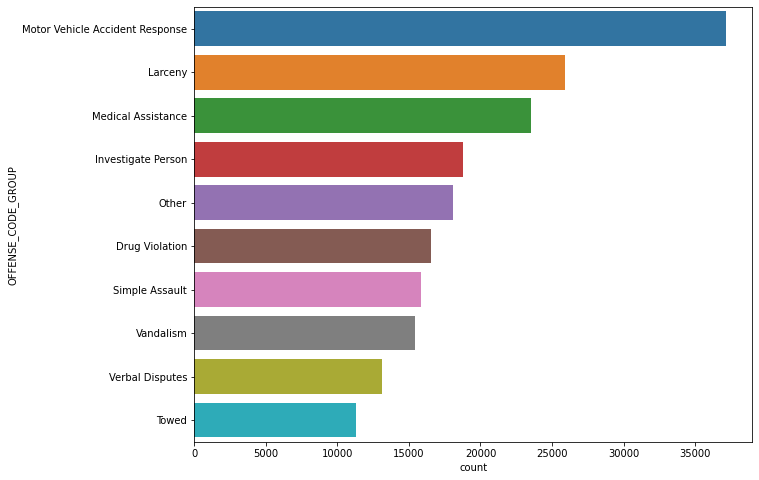

In [ ]:
crimes=data_norm['OFFENSE_CODE_GROUP'].value_counts()
rcParams["figure.figsize"] = 10,8
ord = data_norm['OFFENSE_CODE_GROUP'].value_counts().head(10).index
sns.countplot(data=data_norm, y='OFFENSE_CODE_GROUP',order=ord)

Так как пропусков данных изначально не было, "топ" происшествий остаётся прежним: аварии, воровство, оказание медпомощи

###Наиболее частые преступления со стрельбой отличаются от частых происшествий по всей выборке

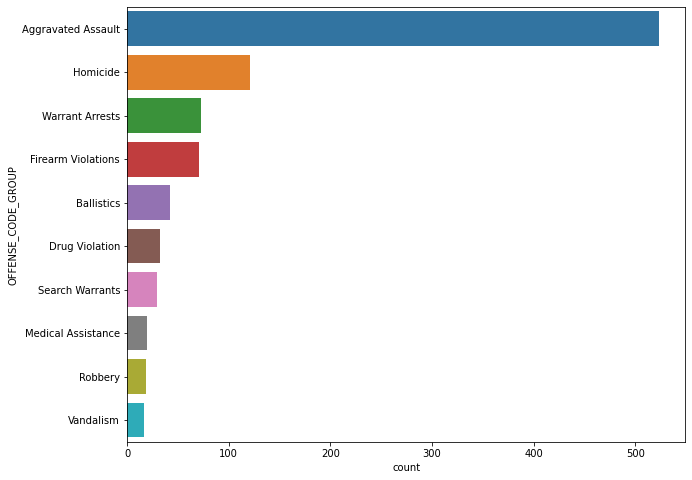

In [ ]:
rcParams["figure.figsize"] = 10,8
ord1 = data_norm[data_norm['SHOOTING']==1]['OFFENSE_CODE_GROUP'].value_counts().head(10).index
sns.countplot(data=data_norm[data_norm['SHOOTING']==1], y='OFFENSE_CODE_GROUP',order=ord1)

Наиболее частые преступления со стрельбой действительно отличаются от частых преступлений без стрельбы: нападения, убийства и арест с применением оружия. Во 2 работе также были предобработаны данные по стрельбе

###В каких районах чаще всего происходят преступления

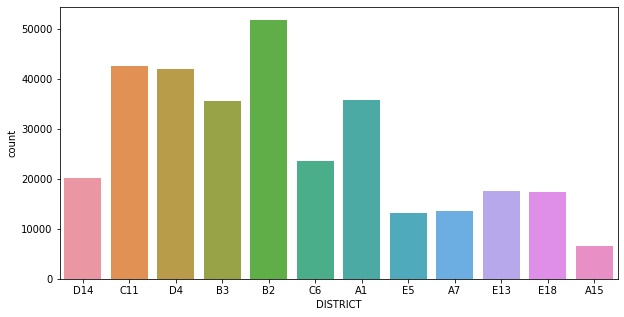

In [ ]:
rcParams["figure.figsize"] = 10,5
sns.countplot(data=data_norm, x='DISTRICT')

Так как на этапе предобработки данных небольшое количество(~1500) недостающих значений районов было заменено на моду, результат остаётся преждними: чаще всего происходят в районах B2, C11, D4. Реже - в A15, E5, A7

###В каких районах чаще всего происходит стрельба и совпадают ли они с предыдущими наиболее криминализированными районами по данным всей выборки

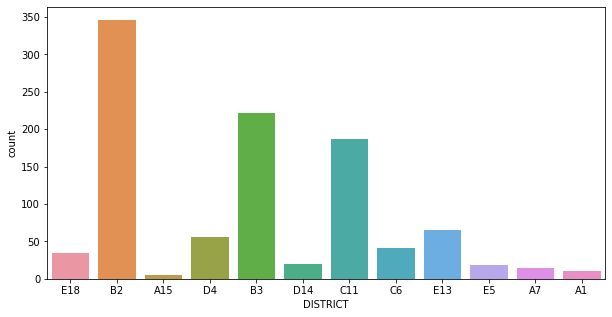

In [ ]:
rcParams["figure.figsize"] = 10,5
sns.countplot(data=data_norm[data_norm['SHOOTING']==1], x='DISTRICT')

Из-за замены на моду, которая равна значению 'B2'., результат такой же: наиболее опасными районами являются B2, B3, C11. D4 по количеству происшествий в первую тройку самых опасных районов не вошел. A15 остаётся самым безопасным.

###Какие происшествия чаще всего происходят в самом опасном и самом безопасном районах: B2 и A15 соответственно

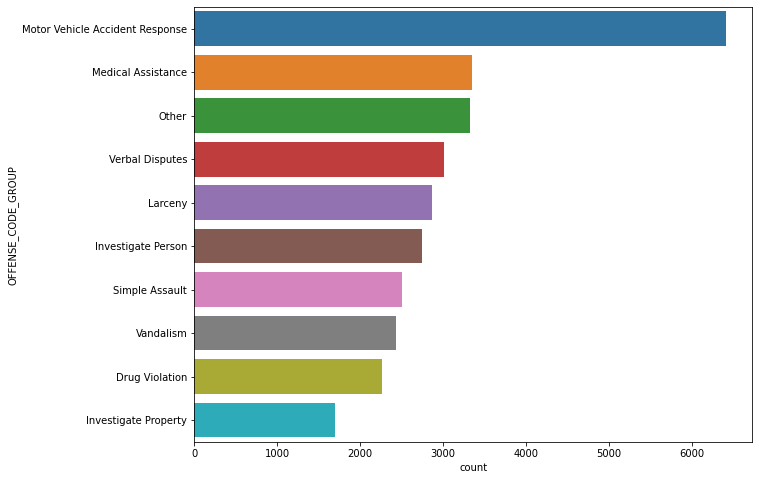

In [ ]:
rcParams["figure.figsize"] = 10,8
ord2 = data[data['DISTRICT']=='B2']['OFFENSE_CODE_GROUP'].value_counts().head(10).index
sns.countplot(data=data[data['DISTRICT']=='B2'], y='OFFENSE_CODE_GROUP',order=ord2)

Так как район В2 по-прежнему остается самым опасным, рассматриваем его. Нехватки данных по преступлениям не было, поэтому результат тот же: наиболее частые происшествия в самом криминальном районе - это аварии, оказание медпомощи и "иное".

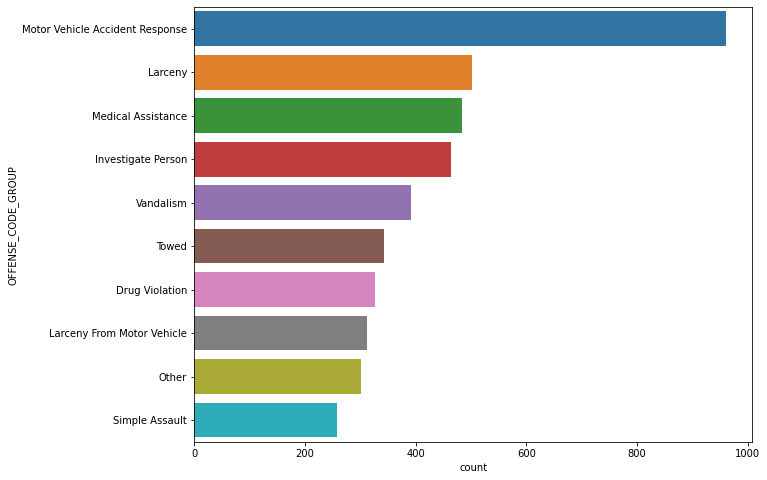

In [ ]:
rcParams["figure.figsize"] = 10,8
ord3 = data_norm[data_norm['DISTRICT']=='A15']['OFFENSE_CODE_GROUP'].value_counts().head(10).index
sns.countplot(data=data_norm[data_norm['DISTRICT']=='A15'], y='OFFENSE_CODE_GROUP',order=ord3)

Наиболее частые происшествия в самом криминальном районе - это аварии, кражи и оказание медпомощи.

###Количество происшествий в каждом году

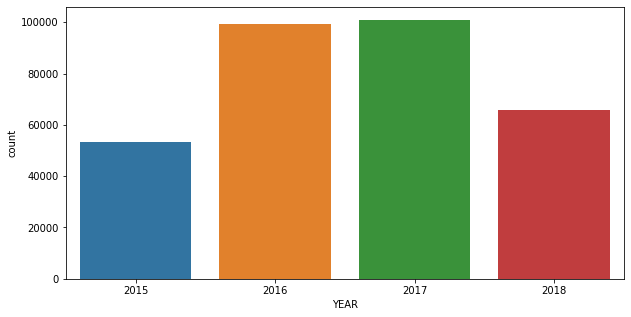

In [ ]:
rcParams["figure.figsize"] = 10,5
sns.countplot(data=data_norm, x='YEAR')

Отсутсвия данных о годе происшествия не было. Такие различия могут быть обусловлены тем, что статистика в 2015 и 2018 собиралась не весь год: не с самого начала 2015го и не до конца 2018го.

###Количество происшествий в каждом месяце

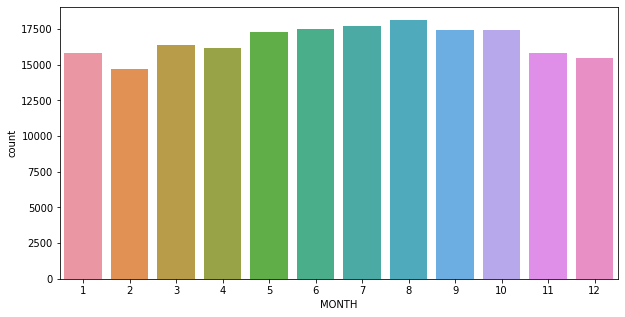

In [ ]:
rcParams["figure.figsize"] = 10,5
sns.countplot(data=data_norm[(data_norm['YEAR']==2016)|(data_norm['YEAR']==2017)], x='MONTH')

Данные о месяце происшествования также были полными. Наблюдается небольшое увеличение преступности с конца весны до середины осени

###Распределение происшествий по дням недели

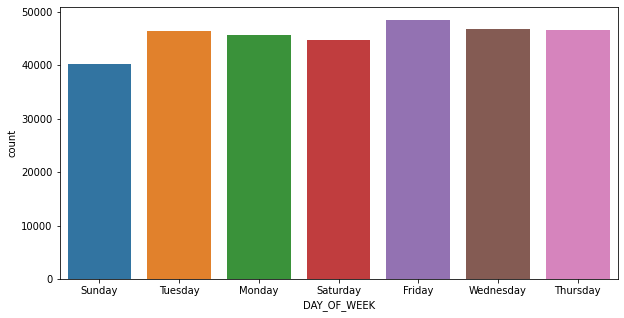

In [ ]:
rcParams["figure.figsize"] = 10,5
sns.countplot(data=data_norm, x='DAY_OF_WEEK')

Чаще всего происходят преступления в пятницу, реже - в воскресенье

###Распределение преступлений по часам


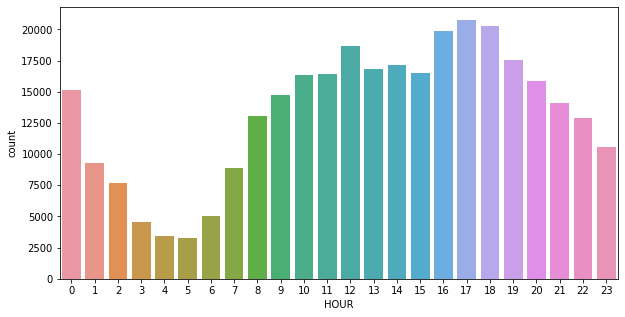

In [ ]:
rcParams["figure.figsize"] = 10,5
sns.countplot(data=data_norm, x='HOUR')

Преступления чаще всего происходят днем и вечером

Так как гипотезы из второй работы почти не требовали предобработанных данных, за исключением заполнения пропусков "Shooting" и "District", результаты не изменились

##Проверка гипотез из работы 3

###1 Некоторые преступления могут носить "сезонный" характер

Например, ограбления. Так как обычно дома грабят, когда его жители отсутсвуют, чтобы не столкнуться с владельцами, то количество таких преступлений в прадники может увеличиться, так как некоторые семью уезжают на каникулы/прадники в отпуск или к родственникам

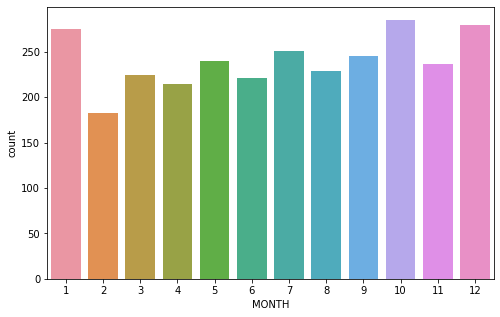

In [ ]:
rcParams["figure.figsize"] = 8,5
sns.countplot(data=data_norm[((data_norm['YEAR']==2016)|(data_norm['YEAR']==2017))&
                             (data_norm['OFFENSE_CODE_GROUP']=='Robbery')], x='MONTH')

Видно некоторое повышение количества ограблений в некоторые месяцы. Особенно в зимние месяцы, когда проходят новогодние праздники.

###2 Распределение количества вандализма зависит от времени года и дня недели

Так как вандализмом нередко занимаются молодые люди, в том числе и школьники, количество подобных преступлений может вырасти в то время, когда подростки свободны от учёбы

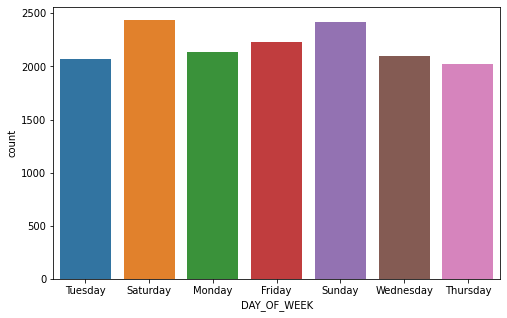

In [ ]:
sns.countplot(data=data_norm[(data_norm['OFFENSE_CODE_GROUP']=='Vandalism')], x='DAY_OF_WEEK')

Видно, что в пятницу и выходные количество таких преступлений увеличивается

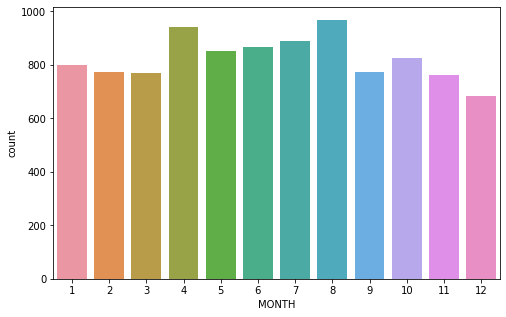

In [ ]:
sns.countplot(data=data_norm[((data_norm['YEAR']==2016)|(data_norm['YEAR']==2017))&
                             (data_norm['OFFENSE_CODE_GROUP']=='Vandalism')], x='MONTH')

Видно заметное увеличение количства вандализма ранней весной, с началом потепления, а также летом.

Таким образом, действительно наблюдается некоторое повышение количества происшествий, связанных с вандализмом, во время, когда подростки освобождаются от учёбы

###3 Районы с наибольшим количеством опасных преступлений(со стрельбой) и самые безопасные отделены друг от друга

Районы с наибольшим количеством опасных преступлений(со стрельбой) находятся рядом друг с другом, так как это немалая часть города с дешевым жильём, где живут неблагополучные слои общества. Даже если рядом более дорогие дома, криминализированное население одного района всё равно будет взаимодействовать с данным районом, что приведёт к некоторому увеличению уровня преступности. Также самые безопасные районы не будут смежны с криминальной территорией

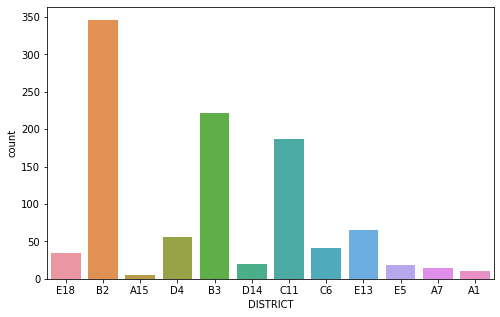

In [ ]:
sns.countplot(data=data_norm[data_norm['SHOOTING']==1], x='DISTRICT')

Итак, нас интересуют опасные районы B2, B3, C11 и безопасные A15, A1, A7

Карта города:

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


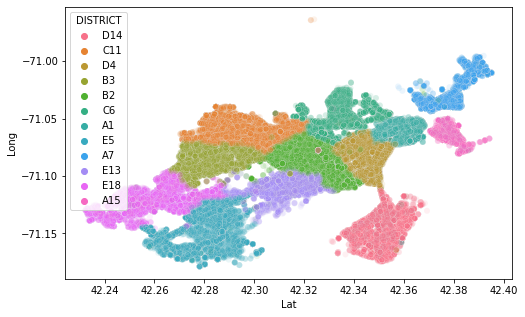

In [ ]:
sns.scatterplot(x='Lat',
                y='Long',
                hue='DISTRICT',
                alpha=0.1,
                data=data_norm)

Для наглядности оставим на карте только интересующие нас районы:

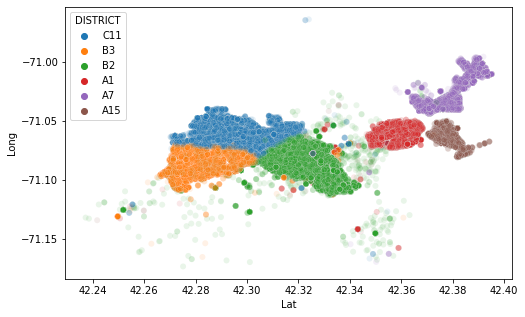

In [ ]:
sns.scatterplot(x='Lat',
                y='Long',
                hue='DISTRICT',
                alpha=0.1,
                data=data_norm[(data_norm['DISTRICT']=='B2')|
                               (data_norm['DISTRICT']=='B3')|
                               (data_norm['DISTRICT']=='C11')|
                               (data_norm['DISTRICT']=='A15')|
                               (data_norm['DISTRICT']=='A1')|
                               (data_norm['DISTRICT']=='A7')])

Действительно опасные районы находятся рядом друг с другом и образуют криминализированную область города. Безопасные районы также находятся рядом и отделены от опасной части города другими районами (D4 и C6) со средним уровнем преступности

###4 Вне зависимости от степени "криминальности" района распределения количества преступлений для разных районов будут примерно одинаковые

Количество может отличаться от района к району, но некоторые обстоятельства, при которых могут чаще совершаться преступления(праздники, время года и тд) везде одинаковые.

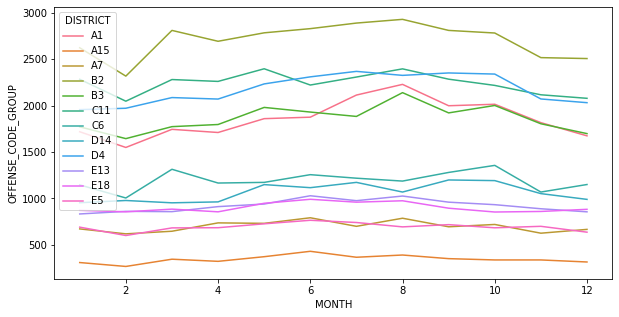

In [ ]:
rcParams["figure.figsize"] = 10,5
month_distr = data_norm[(data_norm['YEAR']==2016)|
                        (data_norm['YEAR']==2017)].groupby(['MONTH','DISTRICT']).count()
sns.lineplot(data = month_distr.reset_index(), x = 'MONTH',
             y = 'OFFENSE_CODE_GROUP', hue = 'DISTRICT')

Конечно, полностью графики не совпадают, но видна тенденция к уменьшению преступлений в феврале, а также увелитчение в летний период

###5 Наиболее "популярные" преступления могут отличаться в безопасных и криминальных районах

Вряд ли будет такое, что в самом безопасном районе чаще всего происходит лишь вандализм, а в самом опасном - убийство. Однако разница в уровнях финансового благополучия населения и разница в окружающей обстановке вносят вклад в поведение людей, и также могут влиять на то, что люди наиболее часто совершают

In [ ]:
ord_danger = data_norm[(data_norm['DISTRICT']=='B2')|
                       (data_norm['DISTRICT']=='B3')|
                       (data_norm['DISTRICT']=='C11')]['OFFENSE_CODE_GROUP'].value_counts().head(7).index

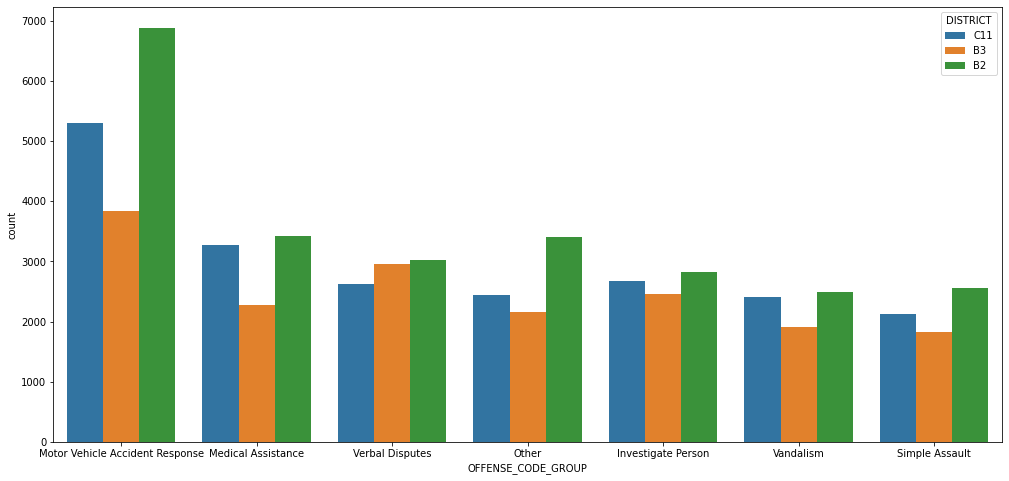

In [ ]:
rcParams["figure.figsize"] = 17,8
sns.countplot(data = data_norm[(data_norm['DISTRICT']=='B2')|
                               (data_norm['DISTRICT']=='B3')|
                               (data_norm['DISTRICT']=='C11')],x = 'OFFENSE_CODE_GROUP',
               hue = 'DISTRICT', order = ord_danger)

In [ ]:
ord_safe = data_norm[(data_norm['DISTRICT']=='A15')|
                     (data_norm['DISTRICT']=='A1')|
                     (data_norm['DISTRICT']=='A7')]['OFFENSE_CODE_GROUP'].value_counts().head(7).index

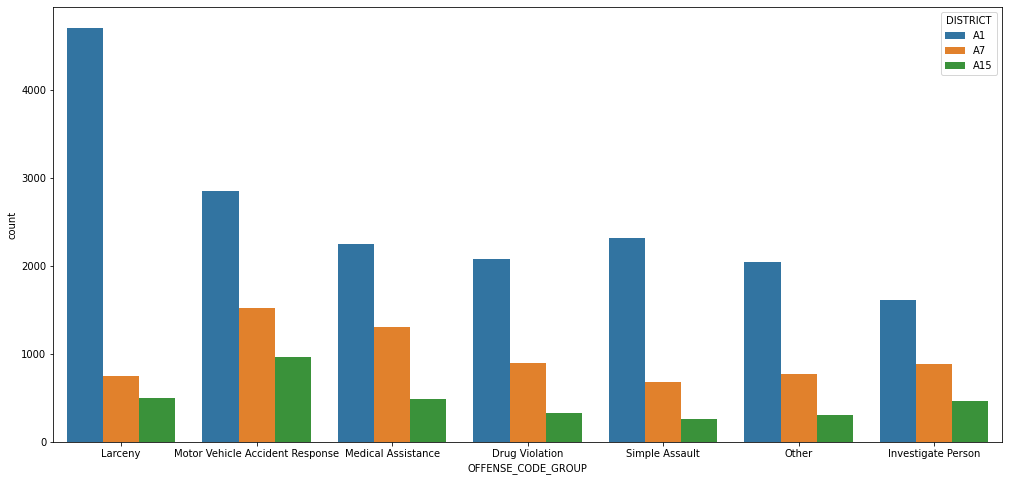

In [ ]:
sns.countplot(data = data_norm[(data_norm['DISTRICT']=='A15')|
                               (data_norm['DISTRICT']=='A1')|
                               (data_norm['DISTRICT']=='A7')], x = 'OFFENSE_CODE_GROUP',
               hue = 'DISTRICT', order = ord_safe)

"Топ" преступлений сильно отличается. Как ожидалось, нет такого, что в опасных районах "популярны" тяжкие преступления. Однако наоборот, там очень много мелких происшествий. Возможно, такое происходит потому, что из-за меньшего финансового благополучия в криминальных районах там скапливается население, для которого является естественным девиантное поведение(вандализм, словесные перепалки на улицах). Также влиять может общая обстановка района(эффект разбитых окон). 

Для безопасных районов характерно воровство, что может быть обусловлено тем, что преступники хотят получить больше выгоды, поэтому идут воровать в благополучные районы, где уровень жизни выше. Также в списке частых происшествий отсутствуют мелкие преступления как, например, вандализм. Подобное также можно объяснить тем, что население более благополучно и менее склонно к мелкому вредительству.